# [Bike Sharing Dataset (Regression) - Group 11]

Group Members:



*   Melisa Çember
*   Fatih Mutlu
*   Ece Erten
*   Doğukan Özbakır
*   Cenk Şire




## Introduction

<font color="green">
	Bike sharing systems are a new perspective of rent a bike where all the process starts with taking membership, rent and return in online.  Through the agency of these systems, user can pick up bike, where the system allows, then leave it back without waiting anyone.  Nowadays, there are noticeable enthusiasm in these systems because of their significant role in traffic, environmental and health issues.  Considering these aspects, being a company that provide a service should concern to meet their users demands.  In our project, with the help of a dataset about a bike sharing company located at Washington DC, we take this concern as a basis. The dataset, which is composed of information such as weather variables, rental hours, number of bikes rented, their user, etc. To examine our basis, we plan to concentrate on whether users’ rent bikes as a hobby or use as a transportation. According to answers to this question, company will more easily and effectively meet users’ demand. We plan to label the rental hours/days and weather conditions after cleaning and sorting the data regarding rental hours/days to detect the working hours/days and the objective of use. In the end of our project, we aim to be able to distinguish future user behaviors as well as examination of the demand for bike with the help of previous data. 
</font>

### Utilized Datasets

<font color="blue">
The dataset we will be using is “Bike Sharing” dataset which has data between the years 2011-2012. We provided the data from UCI – Machine Learning Repository that can be found in this link. We will use hour.csv” file. 
Our data consists of 731 observations and 17 variables.
These are:


\- instant: record index

\- dteday: date

\- season: season (1:winter, 2:spring, 3:summer, 4:fall)

\- yr: year (0: 2011, 1:2012)

\- mnth: month (1 to 12)

\-	hr: hour (0 to 23)

\-	holiday: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

\-	weekday: day of the week

\- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

\-	weathersit:
*	1: Clear, Few clouds, Partly cloudy, Partly cloudy
*	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

\-	temp: Normalized temperature in Celsius. The values are divided to 41 (max)

\- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

\-	hum: Normalized humidity. The values are divided to 100 (max)

\-	windspeed: Normalized wind speed. The values are divided to 67 (max)

\-	casual: count of casual users

\-	registered: count of registered users

\-	cnt: count of total rental bikes including both casual and registered

</font>

In [1]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
fname = "hour.csv"
path = "./drive/My Drive"
df = pd.read_csv(path+"/"+fname)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###Data Cleaning and Data Description

In [4]:
#we don't need some of the columns so drop them
print(f'column num before drop = {len(df.columns)}')
df = df.drop(["instant","dteday","yr","holiday","casual","registered","mnth","weathersit","temp"],axis =1)
print(f'column num after drop = {len(df.columns)}')
df.describe()

column num before drop = 17
column num after drop = 8


,season,hr,weekday,workingday,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,11.546752,3.003683,0.682721,0.475775,0.627229,0.190098,189.463088
std,1.106918,6.914405,2.005771,0.465431,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.000000,1.000000,0.000000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,12.000000,3.000000,1.000000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,18.000000,5.000000,1.000000,0.621200,0.780000,0.253700,281.000000
max,4.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,977.000000


###Analyzing the Dataset

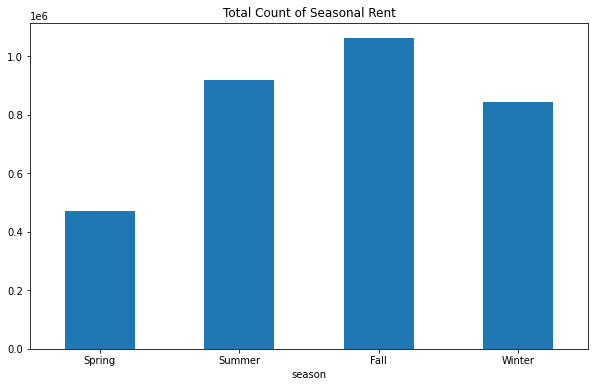

In [5]:
#Analyzing by season
season_counts = pd.DataFrame(df.groupby(by=["season"])["cnt"].sum())
season_counts.plot.bar(rot=0,figsize = (10,6),legend = False)
plt.title("Total Count of Seasonal Rent")
plt.xticks([0,1,2,3],["Spring", "Summer", "Fall", "Winter"])
plt.show()

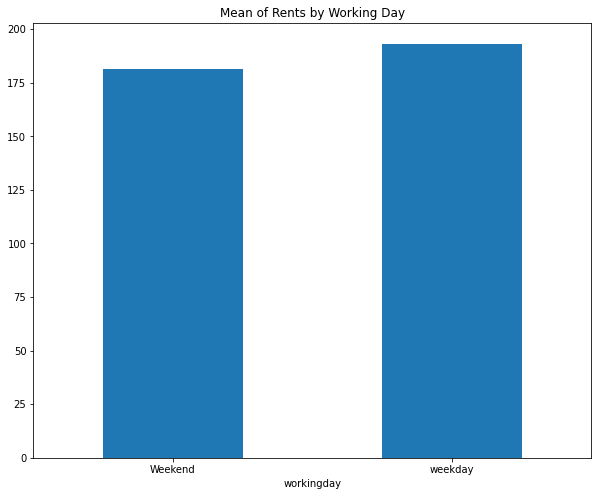

In [6]:
#Analyzing the dataset by mean of rent during weekdays and weekends
working = pd.DataFrame(df.groupby(by=["workingday"])["cnt"].mean())
working.plot.bar(rot=0,figsize = (10,8),legend = False)
plt.xticks([0,1],["Weekend","weekday"])
plt.title("Mean of Rents by Working Day")
plt.show()

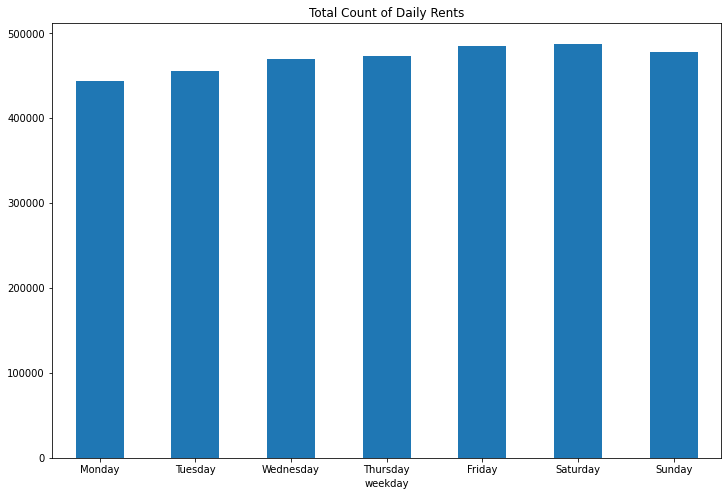

In [7]:
#Since weekends and weekdays have close values, we divided the data by each day
day_counts = pd.DataFrame(df.groupby(by=["weekday"])["cnt"].sum())
day_counts.plot.bar(rot=0,figsize = (12,8),legend = False)
plt.title("Total Count of Daily Rents")
plt.xticks([0,1,2,3,4,5,6],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()

## Data Exploration

<font color="blue">
Explore the relationship between different variables across datasets. Perform hypothesis tests if necessary. Comment on your resulting figures and findings.

This section corresponds to the work you have done in the progress report.
</font>

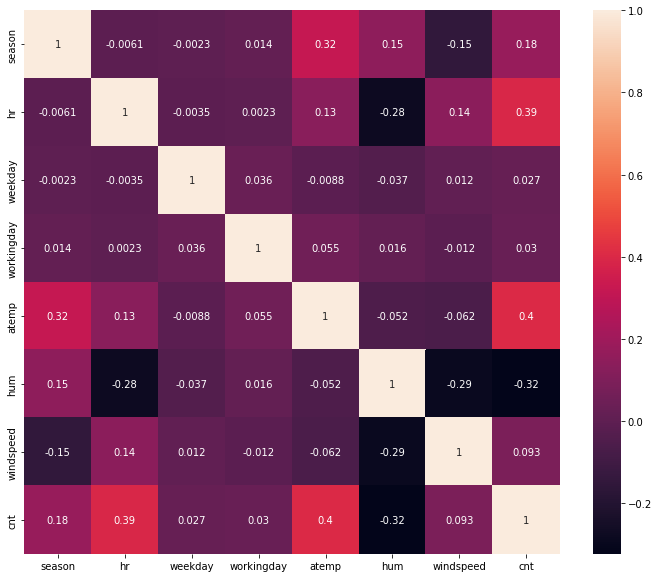

In [8]:
#Observation of cnt column's correlation by heatmap
corr = df.corr()
fig,ax = plt.subplots(1,1,figsize = (12,10))
sns.heatmap(corr,annot=True,xticklabels = df.columns,yticklabels = df.columns)
plt.show()

We observed high correlation between cnt and hour, cnt and atemp, cnt and hum.

After observing those correlations, we decided to use hour.csv and focus on hr and weather.

HYPOTHESIS TESTING

1)Do working times have effect on bike rental counts?
H0 (Null Hypothesis) : The bike's renting cnt in working times and non- working times are equal.
Ha (Alternative Hypothesis) : The bike's renting cnt in working times and non- working times is not equal.

2)Are count of bikes rented same in different types of seasons?
H0 (Null Hypothesis) : cnt of bikes rented is same in different types of seasons
Ha (Alternative Hypothesis) : cnt of bikes rented is different in different types of seasons

3)Do count of bikes rented differ in spare and working time during temp_score is high?
H0 (Null Hypothesis) : cnt of bikes rented is same in spare and working time during temp_score is high 
Ha (Alternate Hypothesis) : cnt of bikes rented is different in spare and working time during temp_score is high

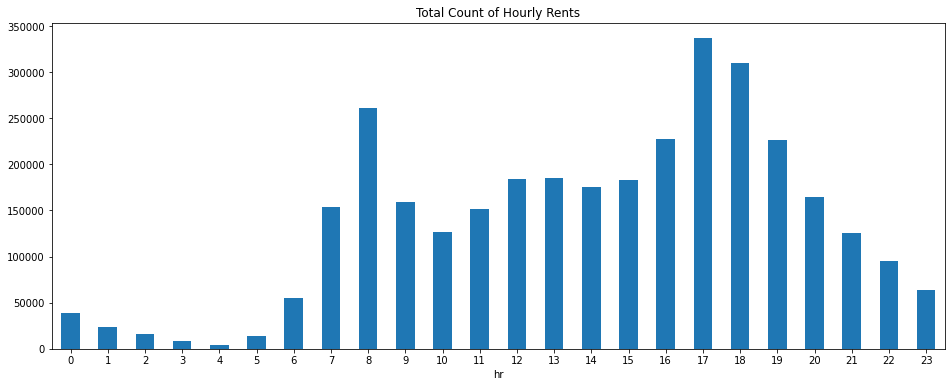

In [9]:
#Observation of the cnt column by hour
hours = pd.DataFrame(df.groupby(by=["hr"])["cnt"].sum())
hours.plot.bar(rot=0,figsize = (16,6),legend = False)
plt.title("Total Count of Hourly Rents")
plt.show()

In [10]:
#To find out whether the working hour is related to rental counts, 
#we decided to divide the data by working hours and spare time
def working(day,hour):
  if day == 1 and hour < 20 and hour > 6:
    return 1
  else:
    return 0

df["is_working"] = df.apply(lambda x: working(x['workingday'], x['hr']), axis=1)

df.head()

,season,hr,weekday,workingday,atemp,hum,windspeed,cnt,is_working
0,1,0,6,0,0.2879,0.81,0.0,16,0
1,1,1,6,0,0.2727,0.80,0.0,40,0
2,1,2,6,0,0.2727,0.80,0.0,32,0
3,1,3,6,0,0.2879,0.75,0.0,13,0
4,1,4,6,0,0.2879,0.75,0.0,1,0


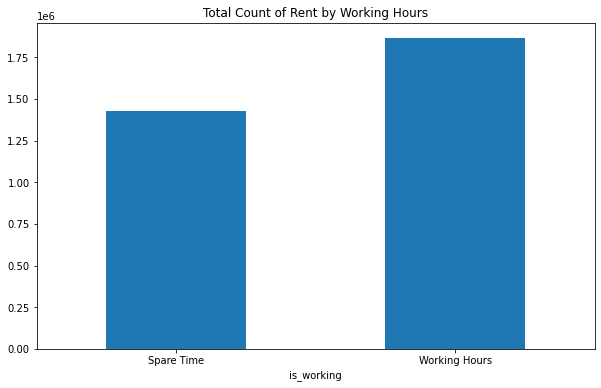

In [11]:
working_counts = pd.DataFrame(df.groupby(by=["is_working"])["cnt"].sum())
working_counts.plot.bar(rot=0,figsize = (10,6),legend = False)
plt.title("Total Count of Rent by Working Hours")
plt.xticks([0,1],["Spare Time","Working Hours"])
plt.show()

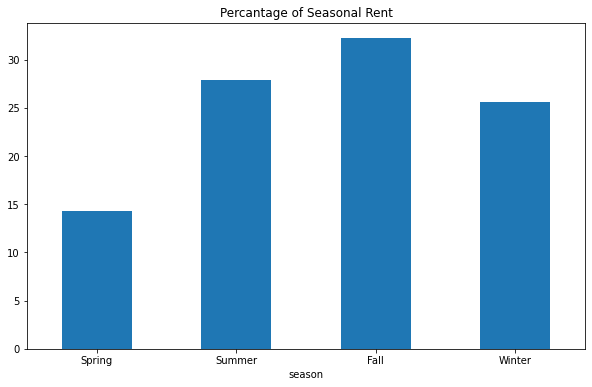

17.80557309826766


In [12]:
h2 = df[["season","cnt"]]
corr = h2.corr()
season_counts["percentage"] = season_counts["cnt"]/season_counts["cnt"].sum()*100
season_counts = season_counts.drop(["cnt"],axis=1)
season_counts.plot.bar(rot=0,figsize = (10,6),legend = False)
plt.title("Percantage of Seasonal Rent")
plt.xticks([0,1,2,3],["Spring", "Summer", "Fall", "Winter"])
plt.show()
print(corr["season"][1]*100)

To understand whether the weather conditions are effective on bike rental counts, we used hum, atemp and windspeed data.
We ranged the weather from 0 to 1, by 0 being the worst weather and 1 being the perfect weather.

In [13]:
#To determine the perfect weather score,
#we have to calculate the absolute difference between perfect score and existing score by percentage

#Perfect humidity level is between 30 and 40 percent for people, we take it as 35
#Since values are divided by 100 in dataset our perfect level is 0.35

#Perfect atemp level is between 18º and 24º, we take it as 21º
#Since values are calculated as (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 our value will be (21-16)/66 = 0.56 for our dataset

#Perfect wind speed is 0

#Calculate the score and add in new row

def score(hum,atemp,wind):
  score = 0
  score += (abs(hum-0.35)/0.35)
  score += (abs(atemp-0.56)/0.56)
  score += abs(wind)
  score_mean = score/3
  #now higher value is bad condition we want make make it opposite
  score_mean = 1-score_mean
  return round(score_mean,3)

df["temp_score"] = df.apply(lambda x: score(x['hum'], x['atemp'],x["windspeed"]), axis=1)
df.head()

,season,hr,weekday,workingday,atemp,hum,windspeed,cnt,is_working,temp_score
0,1,0,6,0,0.2879,0.81,0.0,16,0,0.400
1,1,1,6,0,0.2727,0.80,0.0,40,0,0.400
2,1,2,6,0,0.2727,0.80,0.0,32,0,0.400
3,1,3,6,0,0.2879,0.75,0.0,13,0,0.457
4,1,4,6,0,0.2879,0.75,0.0,1,0,0.457


In [14]:
#now we only need is_working, temp_score and cnt columns so we create a clear data
data = df[["is_working","temp_score","cnt"]]
data.head()

,is_working,temp_score,cnt
0,0,0.400,16
1,0,0.400,40
2,0,0.400,32
3,0,0.457,13
4,0,0.457,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


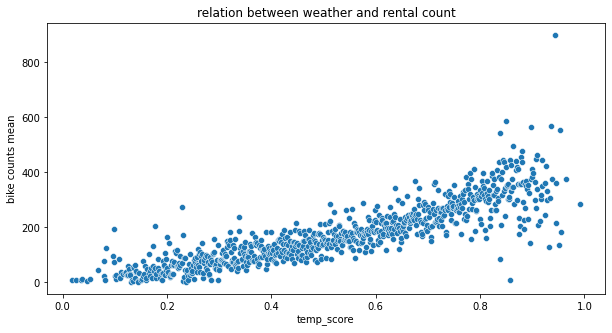

In [15]:
fig , ax = plt.subplots(1,1,figsize = (10,5))
a = pd.DataFrame(data.groupby('temp_score',as_index=False)['cnt'].mean())

sns.scatterplot(a.temp_score.values, a.cnt.values)
plt.xlabel("temp_score")
plt.ylabel("bike counts mean")
plt.title("relation between weather and rental count")
plt.show()

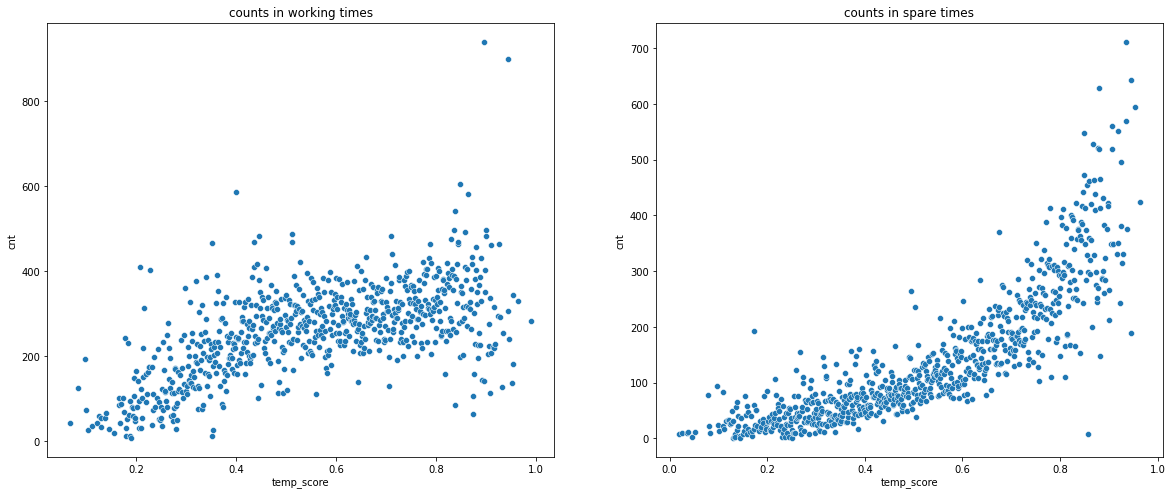

In [16]:
#now we want to examine temp score and count relationship separetly with working times
df_working = data[data['is_working'] == 1]
df_working = pd.DataFrame(df_working.groupby('temp_score',as_index=False)['cnt'].mean())
df_spare = data[data['is_working'] == 0]
df_spare = pd.DataFrame(df_spare.groupby('temp_score',as_index=False)['cnt'].mean())


fig,ax = plt.subplots(1,2,figsize = (20,8))

sns.scatterplot(x='temp_score', y='cnt', data=df_working, ax = ax[0])
sns.scatterplot(x='temp_score', y='cnt', data=df_spare, ax = ax[1])
ax[0].set_title("counts in working times")
ax[1].set_title("counts in spare times")
plt.show()

## Machine Learning Models

<font color="blue">
This is the section that you primarily need work on for the final report. Implement at least two machine learning models so that you can compare them.
</font>

We decided to apply 3 different machine learning models. These models are:
1. Linear Regression Model
2. Polynomial Regression Model
3. Random Forest Model

We will calculate the error values of the models to find out the best way of prediction. The lesser the error, the better the prediction.

In [17]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score ,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Random Forest

In [18]:
#hyperparameter tunning
X = data.temp_score
y = data.cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=0)

best_depth = 0
best_acc = 0
for depth in [2,3,5,7,9,11]:
  model_rf  = RandomForestRegressor(max_depth = depth)
  model_rf.fit(np.array(X_train).reshape(-1,1), y_train)
  acc = model_rf.score(np.array(X_test).reshape(-1,1),y_test)
  print("depth:",depth,", accuracy:",acc )
  if(acc > best_acc):
    best_acc = acc
    best_depth = depth
print("best depth is:",best_depth)

depth: 2 , accuracy: 0.18824889992776073
depth: 3 , accuracy: 0.19296414622580282
depth: 5 , accuracy: 0.19471087106768603
depth: 7 , accuracy: 0.1963756926625443
depth: 9 , accuracy: 0.19459103729742355
depth: 11 , accuracy: 0.18682131569985283
best depth is: 7


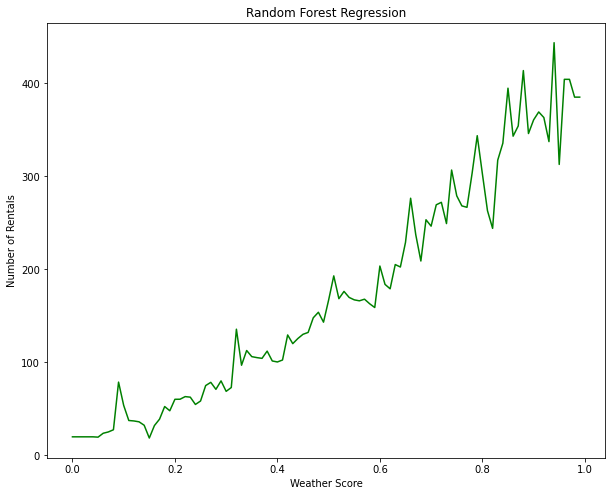

score: 19.64635214240813 %


In [19]:
model_rf  = RandomForestRegressor(max_depth = best_depth)
model_rf.fit(np.array(X_train).reshape(-1,1), y_train)
X_grid = np.arange(0,1,step = 0.01)

fig,ax = plt.subplots(1,1,figsize = (10,8))
x = X_grid
y = model_rf.predict(np.array(X_grid).reshape(-1,1))

plt.plot(x,y, color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Weather Score')
plt.ylabel('Number of Rentals')
score = model_rf.score(np.array(X_test).reshape(-1,1),y_test)
plt.show()
print("score:",score*100,'%')


## Linear Regression

## Polynomial Regression

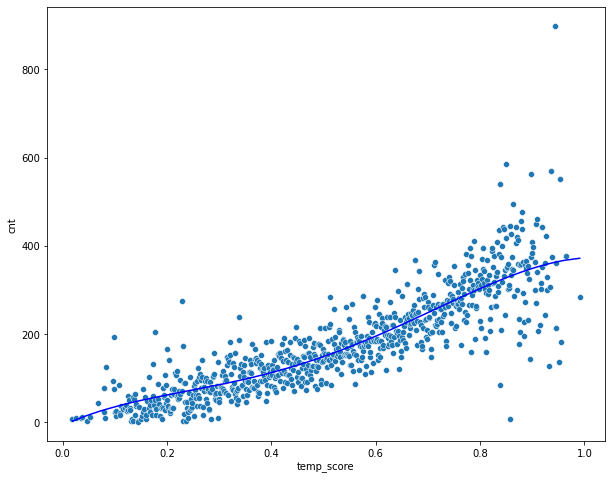

mse: 3213.571582034162
rmse: 56.68837254705908
mae: 37.42471236399054
score: 74.92432459642077 %


In [26]:
X = a.iloc[:, 0:1].values
y = a.iloc[:, 1].values

poly = PolynomialFeatures(degree = 4)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_model = LinearRegression()
poly_model.fit(poly_features, y)
y_predicted = poly_model.predict(poly_features)

fig,ax = plt.subplots(1,1,figsize = (10,8))

ax.plot(X, y_predicted, color = 'blue')
sns.scatterplot(x='temp_score', y='cnt', data=a,ax=ax)
plt.show()

mse = mean_squared_error(y, y_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_predicted)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

score = r2_score(y,y_predicted)
print("score:",score*100,'%')

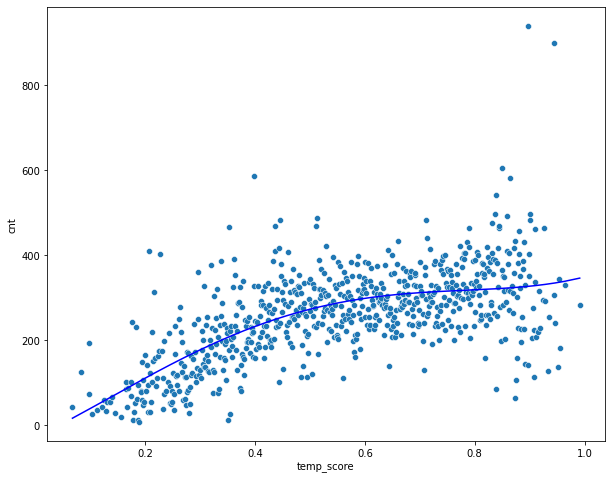

mse: 6972.377968636489
rmse: 83.50076627574437
mae: 60.16999331297564
score: 41.52524191028597 %


In [21]:
#working times
X = df_working.iloc[:, 0:1].values
y = df_working.iloc[:, 1].values

poly = PolynomialFeatures(degree = 4)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_model = LinearRegression()
poly_model.fit(poly_features, y)
y_predicted = poly_model.predict(poly_features)

fig,ax = plt.subplots(1,1,figsize = (10,8))

ax.plot(X, y_predicted, color = 'blue')
sns.scatterplot(x='temp_score', y='cnt', data=df_working,ax=ax)
plt.show()

mse = mean_squared_error(y, y_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_predicted)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

score = r2_score(y,y_predicted)
print("score:",score*100,'%')

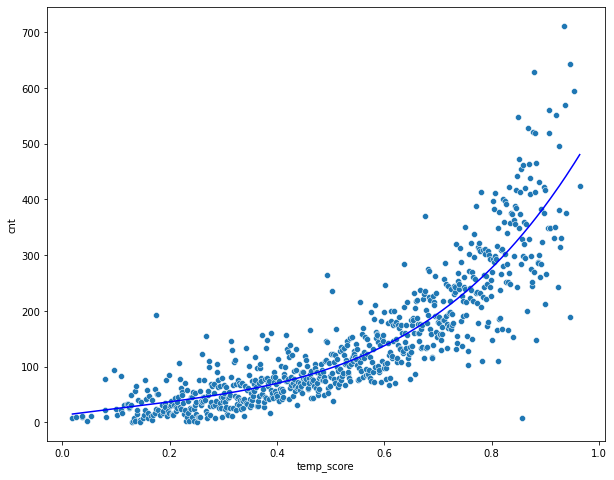

mse: 3000.3094588133245
rmse: 54.77508063721426
mae: 37.41155586089433
score: 79.1598965485838 %


In [22]:
#spare times
X = df_spare.iloc[:, 0:1].values
y = df_spare.iloc[:, 1].values

poly = PolynomialFeatures(degree = 4)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_model = LinearRegression()
poly_model.fit(poly_features, y)
y_predicted = poly_model.predict(poly_features)

fig,ax = plt.subplots(1,1,figsize = (10,8))

ax.plot(X, y_predicted, color = 'blue')
sns.scatterplot(x='temp_score', y='cnt', data=df_spare,ax=ax)
plt.show()

mse = mean_squared_error(y, y_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_predicted)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))
score = r2_score(y,y_predicted)
print("score:",score*100,'%')

### Implementation

<font color="blue">
Implement and evaluate your models. Perform hyperparameter tunning if necessary. Choose the correct evaluation metrics.
</font>

For implementation, first, we analyzed our dataset. We cleared NaN values and dropped the values we won't be needing.  We explored our data by drawing heatmaps to have a clearer view.

Secondly we claimed 3 different hypothesis for the dataset and checked whether should we reject or fail to reject our null hypothesis.

Lastly we applied different machine learning models to our data. These models are Linear Regression, Polynomial Regression and Random Forest. After applying these models we decided that polynomial regression gives the best fit.

### Results & Discussion

<font color="blue">
Display and discuss the results of your models. Deploy tables, figures etc. to present your results. Discuss the advantages/disadvantages of models compared to each other.
</font>

When we examined our data with our top graphics, we realized that the number of bike rentals is proportional to the weather and time. In this direction, there is a column titled "is_working", which shows at that time whether people are at work or in their spare time, and we prepared a column titled "temp_score" to see how far the weather is from the optimal values ​​for people scoring 0 to 1 (0 is the worst, 1 is the most optimal). In the 2 graphs we created using these 2 values, we noticed that the bicycle rental rates of people in their working hours and in their spare time are changing according to weather conditions. While people use more bicycles in their spare time with the better weather, this situation differs in working time. In working times people do not prefer cycling in bad weather conditions same as spare times, but an extra increase can not be observed after the temp_score exceeds 0.5. 

## Conclusion

<font color="blue">
Briefly evaluate your project. Is your solution applicable? What are the advantages/disadvantages of your solution?
</font>

According to machine learning methods we used, polynomial regression is the best fit for eliminating the results. Based on polynomial regression results, weather variables have stable effect on renting bikes. We concluded that working time has a greater effect on rental counts rather than weather’s effect, and Temp score has a decreasingly growing effect on rental counts in working times. On the other hand, in spare time temp score has an increasingly growing effect on rental counts.



## Future Work

<font color="blue">
In the progress report, clearly state your goals for the final report.<br>
In the final report, articulate on the future directions, scenarios.
</font>

We will apply different machine learning models based on the hypothesis testings we did and graphics we obtained. The machine learning models we plan to use are Linear Regression Model, Polynomial Regression Model and Random Forest Model. Based on the accuracy results, we will use the most accurate one for the prediction.

## Work Division

<font color="blue">
A clear description of the division of work among teammates.
</font>

First of all, we formed ideas about how we could improve our project and move forward efficiently. In this context, we made the distribution of tasks among ourselves. Firstly, Melisa wrote an introduction part about what and why we had chosen our project topic that is titled “number of bike rental prediction”. Then, Melisa, Fatih, Ece, Doğukan and Cenk explained the datasets based on the parameters that we used elaborately, and wrote the information about the project part. Afterwards, we decided which methods would be more efficient to use in our project according to parameters. After this process is completed, we collaboratively formed our code then finalized with our conclusion. 